## Exercise 1

Given the following dataset with two input random variables $X_1$ and $X_2$ and a target variable $Y$, we want to compare two extreme decision tree algorithms:

* OVERFIT will build a full standard ID3 decision tree, with no pruning;
* UNDERFIT will make no splits at all, always having a single node (which is both root and decision).

1. Plot the full OVERFIT tree.
1. What is the CVLOO error for OVERFIT?
1. What is the CVLOO error for UNDERFIT?

In [ ]:
import pandas as pd

from tools.plots import plot_decision_surface

d = pd.DataFrame({'X1': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8],
                  'X2': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
                  'Y' : [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]})

## Exercise 2

Suppose we learned a decision tree from a training set with binary output values (either 0 or 1). We find that for a leaf node $l$, 

* there are $M$ training examples falling into it (labeled either 0 or 1); 
* its entropy is $H$. 

1. Create a graph using `matplotlib` that shows the entropy $H$ as a function of the proportion of 1s in $M$. The proportion should be on the $x$ axis (from 0 to 1), while the entropy should be on the $y$ axis.
1. Create a simple algorithm which takes as input $M$ and $H$ and that outputs the number of training examples misclassified by leaf node $l$.


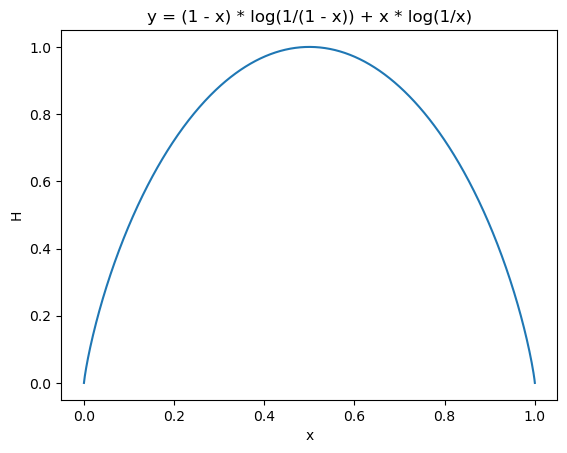

For M = 273 and H = 0.37, the number of misclassified instances is 34
For M = 57 and H = 0.57, the number of misclassified instances is 14
For M = 50 and H = 0.5, the number of misclassified instances is 3


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def H(x): # x - proportion of 1's in M
    return (1-x)*np.log2(1/(1-x)) + x*np.log2(1/x)

def misclassified_cnt(M, H_value):
    left = 0
    right = 0.5
    while right - left > 1e-10: # binary search for proportion of 1's that give that entropy
        if H_value > H((right - left) / 2):
            left += (right - left) / 2
        else:
            right -= (right - left) / 2
    
    return round(left * M)

x = np.linspace(1e-10, 1 - 1e-10, 1000) # avoid 0 and 1 to not divide by 0
y = H(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('H')
plt.title('y = (1 - x) * log(1/(1 - x)) + x * log(1/x)')
plt.show()

# 2
print(f'For M = 273 and H = 0.37, the number of misclassified instances is {misclassified_cnt(273, 0.37)}')
print(f'For M = 57 and H = 0.57, the number of misclassified instances is {misclassified_cnt(57, 0.57)}')
print(f'For M = 50 and H = 0.5, the number of misclassified instances is {misclassified_cnt(100, 0.2)}')



## Exercise 3

Given the dataset below:
1. plot the points and the labels using `matplotib.pyplot.scatter`;
1. train a regular decision tree, then plot its decision surface;
1. create a new dataset with 1000 random points with coordinates between 0 and 10, which the diagonal line $X1 = X2$ perfectly separates in two classes. See [numpy.random.random_sample](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample) for easily generating random numbers between 0 and 1.
1. train a regular decision tree, then plot its decision surface on the new dataset.

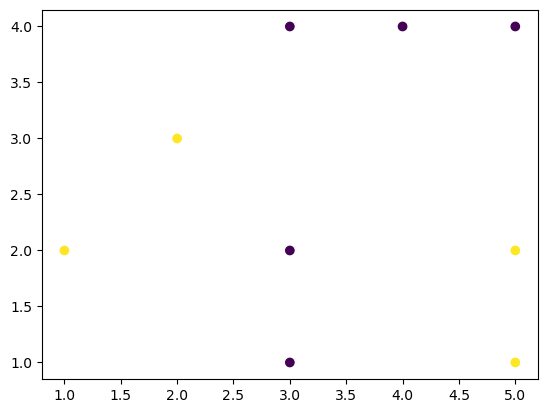

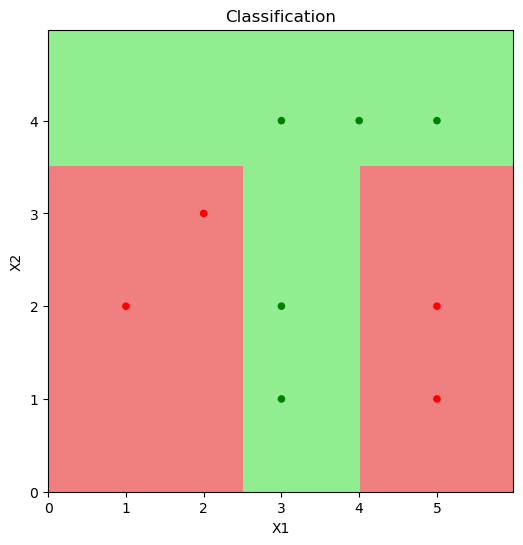

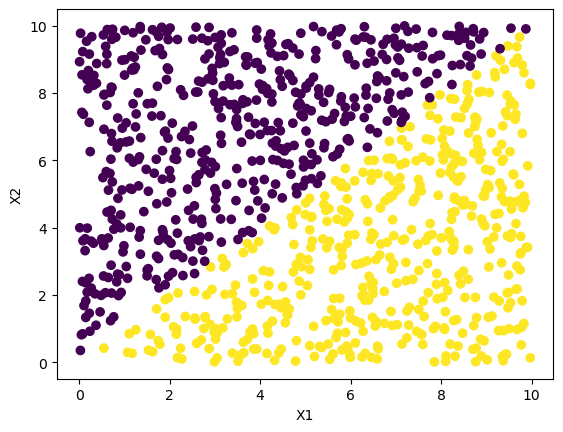

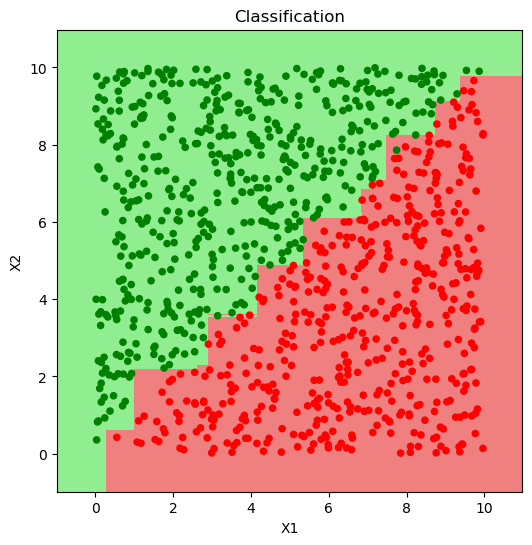

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from tools.plots import plot_decision_surface
import numpy as np

d = pd.DataFrame({'X1': [1, 2, 3, 3, 3, 4, 5, 5, 5],
                  'X2': [2, 3, 1, 2, 4, 4, 1, 2, 4],
                  'Y':  [1, 1, 0, 0, 0, 0, 1, 1, 0]})

# 1
plt.scatter(d['X1'], d['X2'], c=d['Y'])
plt.show()

# 2
X = d.loc[:, ['X1', 'X2']]
Y = d.loc[:,'Y']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)

plot_decision_surface(dt, X, Y)

X1 = np.random.random_sample(1000) * 10
X2 = np.random.random_sample(1000) * 10

Y = (X1 > X2).astype(int)

new_data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

# Plot the points and their labels
plt.scatter(new_data['X1'], new_data['X2'], c=new_data['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Train a decision tree and plot its decision surface
X = new_data[['X1', 'X2']]
Y = new_data['Y']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)

plot_decision_surface(dt, X, Y)